# Simulated annealing

**Simulated annealing (SA)** is a probabilistic technique for approximating the global optimum of a given function.

Comes from the physical process of annealing in which substances are raised to high energy levels (melted) and then cooled to solid state.

![jupyter](./heat_cool.jpg)

## The main idea of the method 
The idea of the method came from metal annealing, a process in which the metal is first heated and then gradually cooled.\
We iteratively select a point at which there can be a minimum and compare the value of the function in it with the value at the previous point. If the value is less, then we just move to a new point. If it is greater, then we move to a new point with some probability, which depends on the value of the parameter-temperature (the lower the temperature, the less likely the transition). Due to this, we can get out of local minima.

<img src="https://miro.medium.com/max/1400/1*DHf9MwQSIXKdN6HQzNLlmA.png" style="width:40px;heigth:10px"/>

## Input and output requirements
**Input**\
Nodes are defined by their coordinates (X, Y) \
Inputs are defined as a text file with the following format \
Line 1: number of nodes \
Line 2 - N: node coordinate - X Y (one node per line).\
**Output**\
Text file with two lines: Line 1: total distance; if the solution is optimal (1) or not (0) Line 2: sequence of the solution route nodes\
Picture of the route\

## Python implementation

## Imports
numpy --> Used for math and logic operations on our data\
scipy --> Used to perform scientific and engineering calculations. Basinhopping is a stochastic algorithm which attempts to find the global minimum of a smooth scalar function of one or more variables\
mutplotlib --> Used for data visualisation, creating plots, graphs, ets

In [74]:
import numpy as np
from scipy import optimize
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt

In [75]:
#the length of the path along the specified route
def distance_along_the_route(points,route):
  distance = 0
  quantity_points = len(route)
  #route = route[:len(route)-1]
  for i in range(quantity_points-1):
    distance = distance + np.sqrt((points[route[i]][0]-points[route[i+1]][0])**2+(points[route[i]][1]-points[route[i+1]][1])**2)
  distance = distance + np.sqrt((points[route[0]][0]-points[route[quantity_points-1]][0])**2+(points[route[0]][1]-points[route[quantity_points-1]][1])**2)
  return distance

In [76]:
#long distance is a big mistake
def error(points,route): 
  return distance_along_the_route(points,route)# - 16

The definition of the program-defined solve() function begins with:

The arange(n) function ("array-range") creates a numpy array with values from 0 to n-1. The built-in shuffle() function scrambles the order of the values the soln array to produce an initial random guess solution.

The main processing loop begins.\
The interval variable controls how often to display progress messages.The loop will terminate if max_iter iterations are reached or if the optimal solution is found, when the error of the current solution is 0.

If the adjacent route is better than the current solution, the adjacent route is always accepted as the new solution. If the adjacent route is worse than the current solution, the adjacent route is sometimes accepted with probability controlled by the current temperature.\
Simulated annealing is a meta-heuristic, meaning it's a set of general guidelines rather than a rigidly defined algorithm. Therefore, there are many possible designs you can use.

In [77]:
 #adjacent route - swaps two random indexes
def adjacent(route, rnd):
  n = len(route)
  result = np.copy(route)
  i = rnd.randint(n) 
  j = rnd.randint(n)
  tmp = result[i]
  result[i] = result[j] 
  result[j] = tmp
  return result
    #main function
def solve(n_cities, rnd, max_iter, start_temperature, alpha, points):
  curr_temperature = start_temperature
  soln = np.arange(n_cities, dtype=np.int64)
  rnd.shuffle(soln)
  err = error(points,soln)
  iteration = 0
  interval = (int)(max_iter / 20)    #frequency of displaying progress messages
  while iteration < max_iter and err > 0.0:
    adj_route = adjacent(soln, rnd)
    adj_err = error(points,adj_route)
    if adj_err < err: # the best route
      soln = adj_route
      err = adj_err
    else:          # neighbors are worse
      accept_p = np.exp((err - adj_err) / curr_temperature) #accept probability
      p = rnd.random()
      if p < accept_p:  
        soln = adj_route
        err = adj_err 
     # otherwise do not accept
    #if iteration % interval == 0:
    #print("iteration = %6d | error = %7.2f | temperature = %10.4f " % (iteration, err, curr_temperature))
    if curr_temperature < 0.00001:
      curr_temperature = 0.00001
    else:
      curr_temperature *= alpha
    iteration += 1
  return soln

The solve() function concludes by displaying progress information, adjusting the current temperature and returning the current (hopefully best) solution.\
Because current temperature is used as the denominator in the expression for the accept-probability, it's necessary to prevent it from becoming 0.

In [78]:
#rendering
def rendering(x,y,render):
  if render != 0:
    plt.plot(x, y)
    plt.scatter(x, y, s=20, c='r')
    plt.show()

In [79]:
#filename = 'C:/python11/spbgu/input.txt'
filename = 'input.txt'
render = 1
x=[]
y=[]
points =[]
quantity_points = 0

In [80]:
#reading from a file
with open(filename, 'r') as f:
    for line in f:
        if quantity_points == 0:
          quantity_points = int(line) 
        else:
          points.append([int(line.split()[0]),int(line.split()[1])])
          x.append(int(line.split()[0]))
          y.append(int(line.split()[1]))

route = list(range(0,quantity_points))

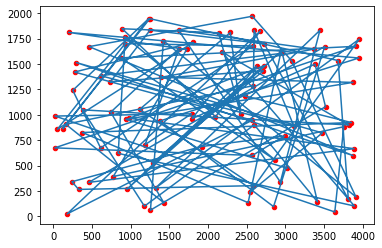

Начальный маршрут:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Начальный маршрут имеет общее расстояние = 191393.738

Настройки: 
max_iter = 30000 
start_temperature = 48000.0 
alpha = 0.99 

Найдено лучшее решение:
[53 14 21 70 23 66 64 94 81 60  8 48 87 24 91 18 17 34 44 62 25 82 97 49
 90 20 63 78 83 68  2 28 67 72  9 11 69 35 84 76  4 32 95 92 52 79 88 45
 27  1 54 86 31 51 93 99 22 30 74 10  7 42 50 57 41 55 98 39 33 59 12 16
 13 89  3 38 80 29  5 75 15 19 71 37 65 43 73 85 96 40 47 26 61 56 58  6
 36  0 77 46]
Общее расстояние = 38205.757 


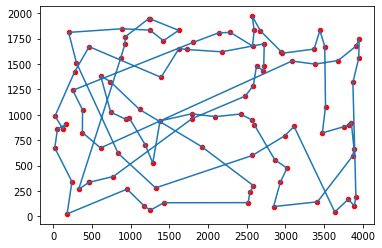

In [81]:
#initial drawing of points
rendering(x,y,render)
################################################################   
print("Начальный маршрут:") 
print(route) 
print("Начальный маршрут имеет общее расстояние = %0.3f" % distance_along_the_route(points,route)) 
rnd = np.random.RandomState(4) 
max_iter = 30000#24000 
start_temperature = 48000.0#500000.0 
alpha = 0.99    #The temperature decrease is controlled by the alpha value: T=T*alpha
print("\nНастройки: ") 
print("max_iter = %d " % max_iter) 
print("start_temperature = %0.1f " % start_temperature) 
print("alpha = %0.2f " % alpha)
#new_route=route
#print("\n")
new_route = solve(quantity_points,rnd,max_iter,start_temperature,alpha,points)

print("\nНайдено лучшее решение:") 
print(new_route) 
dist = distance_along_the_route(points,new_route)
print("Общее расстояние = %0.3f " % dist) 

#writing the result to a file
f = open('output.txt', 'w')
f.write(str(dist)+' 0'+'\n')
stri = ''
for i in new_route:
  stri = stri + str(i) + ' '
f.write(stri)
f.close()

x.append(x[0])
y.append(y[0])
#rendering(x,y,render)
new_x = []
new_y = []
for i in range(len(new_route)):
  new_x.append(x[new_route[i]])
  new_y.append(y[new_route[i]])
new_x.append(x[new_route[0]])
new_y.append(y[new_route[0]])

rendering(new_x,new_y,render)

## Sources

[1] https://en.wikipedia.org/wiki/Simulated_annealing

[2] https://visualstudiomagazine.com/Articles/2021/12/01/traveling-salesman.aspx?Page=2

[3] https://habr.com/ru/post/209610/